In this notebook, we'll simulate a one-dimensional stochastic process with white-noise input.

In [59]:
import matplotlib.pyplot as plt
import numpy as np


Let our stochastic process be given by 
$$
X[t+1] = A X[t] + V[t],
$$
where $V[t] \sim \mathcal{N}(0,\sigma^2)$ is a random variable that is drawn independently at each timestep.

Let's start by taking a look at how to get $V$, assuming $\sigma = 1$:

Text(0, 0.5, 'p(V)')

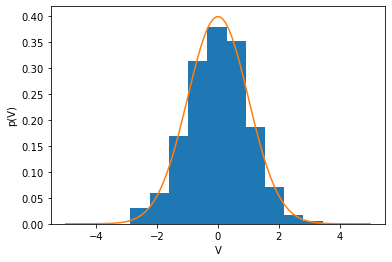

In [68]:
n_steps = 1000
v = np.random.randn(n_steps)

# We can plot the V we just got together with the 
# standard normal distribution that they are drawn from:
plt.hist(v, density=True)
plt.plot(np.linspace(-5, 5, 100), np.exp(-0.5 * np.linspace(-5, 5, 100)**2) / (2 * np.pi)**0.5)
plt.xlabel('V')
plt.ylabel('p(V)')

**Exercise**: Using the $V$ we just obtained, simulate the random process $X[t]$ for `n_timesteps`, assuming $X[0]=0$ and $A = 0.8$. Plot both $X$ and $V$.

Text(0.5, 0, 'time step')

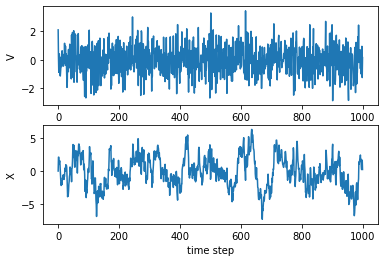

In [69]:
### Solution ###

a = 0.9
x = np.zeros(n_steps)

for t in range(n_steps-1):
    x[t+1] = a * x[t] + v[t]

plt.subplot(211)
plt.plot(v)
plt.ylabel('V')
plt.subplot(212)
plt.plot(x)
plt.ylabel('X')
plt.xlabel('time step')

Let's compute the autocorrelation of the above time series, computing the autocorrelation first using our simulated data and then comparing this to the theoretical result.

To compute the autocorrelation from data, we use its definition
$$
r(\tau) = \mathbb{E} (X[t] X[t+\tau])
$$
and then approximate the expectation as just the average over the data points that we observe. We might try
$$
r_\mathrm{exp}(\tau) = \frac{1}{T} \sum_{t=1}^{T} X[t] X[t+\tau].
$$
But note that this doesn't quite work since it would require data from timepoints $t+\tau > T$. So we can instead use
$$
r_\mathrm{exp}(\tau) = \frac{1}{T-\tau} \sum_{t=1}^{T-\tau} X[t] X[t+\tau].
$$

The theoretical result for the autocorrelation, which we computed in class, is
$$
r_\mathrm{theory}(\tau) = \frac{\sigma^2 A^\tau}{1 - A^2}.
$$

**Exercise**: Using the data we just simulated, compute the autocorrelation both ways and plot the results together.

Text(0, 0.5, 'r')

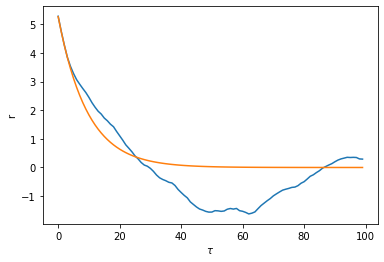

In [70]:
## Solution ##

n_tau = 100
tau_range = np.arange(n_tau)
r = np.zeros(n_tau)
r[0] = np.mean(x**2)
for tau in tau_range[1:]:
    r[tau] = np.mean(x[:-tau] * x[tau:])
    
#r_predicted = np.exp(a * tau_range) / (2 * np.abs(a)) # continuous-time version
r_predicted = a**tau_range / (1 - a**2)

plt.plot(r)
plt.plot(tau_range, r_predicted)
plt.xlabel('$\\tau$')
plt.ylabel('r')